In [ ]:
###문제[0-1]연속적인 T의 개수 최대값 구하기(방법1)

In [2]:
#dfs 함수 설명 (예시)

graph={'A': set(['B', 'C']), 'B': set(['A', 'D','E']), 'C':set(['A','F']), 'D':set(['B']), 'E':set(['B', 'F']), 'F':set(['C','E'])}

def dfs(graph, start):
    visited=[]
    stack=[start]
    
    while stack:
        n=stack.pop()
        if n not in visited:
            visited.append(n)
            stack+=graph[n]-set(visited)
    return visited

print(dfs(graph, 'A'))

['A', 'C', 'F', 'E', 'B', 'D']


In [23]:
import random
import numpy as np

list1 = []
x=10
y=10

list1 = np.full((x,y),'F')
for i in range(x):
    for j in range(y):
        if(random.random()<0.5):
            list1[i][j] = 'T'       
print(list1)

#--------------------------------------------------
#graph 딕셔너리 만들기 (가장자리는 다른 조건 적용)
def index(i, j):
    dict_all={}
    a={}
    list_t=[]
    set_t=set()
    if list1[i][j] == 'T':
        #4개의 꼭지점 부분
        if i-1<0 and j-1<0:
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        elif i+1>=x and j+1>=y:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
        elif i-1<0 and j+1>=y:
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
        elif i+1>=x and j-1<0:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        #가장자리 부분
        elif i-1<0:
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        elif i+1>=x:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        elif j-1<0:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        elif j+1>=y:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
        #그 외
        else:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
  
        #list와 달리 set은 중복 허용 안함
        dict_all[(i,j)]= set(list_t)
        a=dict_all.copy()
        #다음 (i,j)로 넘어가기 전에 누적 안되도록 모두 비우기
        dict_all={}
        list_t=[]
    return a

#각각의 (i,j)에서 나온 값들 모두 하나의 딕셔너리로 합치기, None값 제외 
#(==graph 딕셔너리)
graph={}
for i in range(x):
    for j in range(y):
        graph.update(index(i,j))
print(graph)

[['T' 'T' 'T' 'T' 'T' 'T' 'F' 'T' 'F' 'T']
 ['T' 'F' 'T' 'F' 'T' 'F' 'T' 'F' 'T' 'T']
 ['T' 'F' 'T' 'T' 'F' 'F' 'T' 'T' 'F' 'F']
 ['T' 'T' 'T' 'F' 'F' 'T' 'T' 'T' 'F' 'F']
 ['T' 'F' 'F' 'T' 'T' 'T' 'T' 'T' 'T' 'T']
 ['F' 'T' 'T' 'T' 'T' 'F' 'F' 'F' 'F' 'T']
 ['F' 'T' 'T' 'F' 'F' 'F' 'F' 'F' 'T' 'F']
 ['T' 'F' 'F' 'T' 'T' 'T' 'T' 'T' 'F' 'F']
 ['F' 'T' 'F' 'F' 'F' 'T' 'F' 'T' 'F' 'F']
 ['F' 'T' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'T']]
{(0, 0): {(0, 1), (1, 0)}, (0, 1): {(0, 0), (0, 2)}, (0, 2): {(1, 2), (0, 3), (0, 1)}, (0, 3): {(0, 2), (0, 4)}, (0, 4): {(0, 3), (0, 5), (1, 4)}, (0, 5): {(0, 4)}, (0, 7): set(), (0, 9): {(1, 9)}, (1, 0): {(2, 0), (0, 0)}, (1, 2): {(0, 2), (2, 2)}, (1, 4): {(0, 4)}, (1, 6): {(2, 6)}, (1, 8): {(1, 9)}, (1, 9): {(0, 9), (1, 8)}, (2, 0): {(3, 0), (1, 0)}, (2, 2): {(1, 2), (3, 2), (2, 3)}, (2, 3): {(2, 2)}, (2, 6): {(2, 7), (1, 6), (3, 6)}, (2, 7): {(3, 7), (2, 6)}, (3, 0): {(2, 0), (3, 1), (4, 0)}, (3, 1): {(3, 0), (3, 2)}, (3, 2): {(3, 1), (2, 2)}, (3, 5): {(4, 5)

In [24]:
import random
import numpy as np

#TF 배열 형성
list1 = []
x=10
y=10

list1 = np.full((x,y),'F')
for i in range(x):
    for j in range(y):
        if(random.random()<0.5):
            list1[i][j] = 'T'       
print(list1)


#graph 딕셔너리 만들기 (가장자리는 다른 조건 적용)
def index(i, j):
    dict_all={}
    a={}
    list_t=[]
    set_t=set()
    if list1[i][j] == 'T':
        #4개의 꼭지점 부분
        if i-1<0 and j-1<0:
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        elif i+1>=x and j+1>=y:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
        elif i-1<0 and j+1>=y:
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
        elif i+1>=x and j-1<0:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        #가장자리 부분
        elif i-1<0:
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        elif i+1>=x:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        elif j-1<0:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        elif j+1>=y:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
        #그 외
        else:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
  
        #list와 달리 set은 중복 허용 안함
        dict_all[(i,j)]= set(list_t)
        a=dict_all.copy()
        #다음 (i,j)로 넘어가기 전에 누적 안되도록 모두 비우기
        dict_all={}
        list_t=[]
    return a

#각각의 (i,j)에서 나온 값들 모두 하나의 딕셔너리로 합치기, None값 제외 
#(==graph 딕셔너리)
graph={}
for i in range(x):
    for j in range(y):
        graph.update(index(i,j))
            
#----------------------------------------------------------------------
#dfs 함수
def dfs(graph, start):
    visited=[]
    stack=[start]
    
    while stack:
        n=stack.pop()
        if n not in visited:
            visited.append(n)
            stack+=graph[n]-set(visited)
    return visited

#첫번째 T의 위치 찾기(==dfs 함수에서 start 값)
list3=[]
for i in range(x):
    for j in range(y):
        if list1[i][j]=='T':
            list3.append((i,j))
print(list3)


[['T' 'T' 'T' 'F' 'F' 'T' 'T' 'T' 'T' 'T']
 ['F' 'T' 'T' 'F' 'F' 'F' 'F' 'F' 'F' 'T']
 ['T' 'T' 'F' 'T' 'F' 'F' 'T' 'T' 'T' 'F']
 ['T' 'T' 'T' 'F' 'F' 'F' 'F' 'F' 'T' 'F']
 ['T' 'T' 'F' 'F' 'T' 'T' 'T' 'T' 'F' 'T']
 ['T' 'T' 'T' 'F' 'F' 'F' 'T' 'F' 'F' 'T']
 ['F' 'F' 'F' 'T' 'F' 'T' 'T' 'F' 'T' 'T']
 ['T' 'T' 'T' 'T' 'T' 'T' 'T' 'F' 'T' 'F']
 ['F' 'T' 'T' 'T' 'F' 'F' 'T' 'F' 'T' 'F']
 ['T' 'F' 'F' 'F' 'T' 'T' 'F' 'T' 'F' 'T']]
[(0, 0), (0, 1), (0, 2), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 1), (1, 2), (1, 9), (2, 0), (2, 1), (2, 3), (2, 6), (2, 7), (2, 8), (3, 0), (3, 1), (3, 2), (3, 8), (4, 0), (4, 1), (4, 4), (4, 5), (4, 6), (4, 7), (4, 9), (5, 0), (5, 1), (5, 2), (5, 6), (5, 9), (6, 3), (6, 5), (6, 6), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 8), (8, 1), (8, 2), (8, 3), (8, 6), (8, 8), (9, 0), (9, 4), (9, 5), (9, 7), (9, 9)]


In [25]:
import random
import numpy as np

#TF 배열 형성
list1 = []
x=10
y=10

list1 = np.full((x,y),'F')
for i in range(x):
    for j in range(y):
        if(random.random()<0.5):
            list1[i][j] = 'T'       
print(list1)


#graph 딕셔너리 만들기 (가장자리는 다른 조건 적용)
def index(i, j):
    dict_all={}
    a={}
    list_t=[]
    set_t=set()
    if list1[i][j] == 'T':
        #4개의 꼭지점 부분
        if i-1<0 and j-1<0:
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        elif i+1>=x and j+1>=y:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
        elif i-1<0 and j+1>=y:
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
        elif i+1>=x and j-1<0:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        #가장자리 부분
        elif i-1<0:
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        elif i+1>=x:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        elif j-1<0:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
        elif j+1>=y:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
        #그 외
        else:
            if list1[i-1][j]=='T':
                list_t.append((i-1,j))
            if list1[i+1][j]=='T':
                list_t.append((i+1,j))
            if list1[i][j-1]=='T':
                list_t.append((i,j-1))
            if list1[i][j+1]=='T':
                list_t.append((i,j+1))
  
        #list와 달리 set은 중복 허용 안함
        dict_all[(i,j)]= set(list_t)
        a=dict_all.copy()
        #다음 (i,j)로 넘어가기 전에 누적 안되도록 모두 비우기
        dict_all={}
        list_t=[]
    return a

#각각의 (i,j)에서 나온 값들 모두 하나의 딕셔너리로 합치기, None값 제외 
#(==graph 딕셔너리)
graph={}
for i in range(x):
    for j in range(y):
        graph.update(index(i,j))

#dfs 함수
def dfs(graph, start):
    visited=[]
    stack=[start]
    
    while stack:
        n=stack.pop()
        if n not in visited:
            visited.append(n)
            stack+=graph[n]-set(visited)
    return visited

#첫번째 T의 위치 찾기(==dfs 함수에서 start 값)
list3=[]
for i in range(x):
    for j in range(y):
        if list1[i][j]=='T':
            list3.append((i,j))
#print(list3)

#-----------------------------------------------------------
#모든 T에 대하여 dfs 값 추출하기
list_dfs=[]
for i in range(len(list3)):
    list_dfs.append(dfs(graph, list3[i]))
#print(list_dfs)

#모든 dfs 값 중 최대값 구하기
max=0
for i in range(len(list_dfs)):
    if len(list_dfs[i])>max:
        max=len(list_dfs[i])
print(max)

[['T' 'F' 'T' 'T' 'F' 'T' 'T' 'F' 'T' 'F']
 ['T' 'T' 'F' 'T' 'F' 'T' 'F' 'T' 'T' 'F']
 ['T' 'T' 'F' 'F' 'T' 'T' 'T' 'F' 'F' 'F']
 ['T' 'F' 'F' 'F' 'F' 'F' 'T' 'T' 'T' 'T']
 ['F' 'F' 'T' 'T' 'T' 'F' 'T' 'T' 'F' 'T']
 ['T' 'T' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F']
 ['F' 'T' 'T' 'F' 'T' 'T' 'T' 'F' 'T' 'T']
 ['F' 'T' 'T' 'F' 'F' 'T' 'F' 'F' 'T' 'T']
 ['T' 'F' 'T' 'T' 'T' 'T' 'T' 'T' 'F' 'T']
 ['F' 'T' 'F' 'T' 'F' 'F' 'F' 'F' 'F' 'T']]
17


In [ ]:
###문제[0-1]연속적인 T의 개수 최대값 구하기(방법2)
###확률 0부터 1까지 0.1씩 증가시키면서 위 과정을 각각 100개의 샘플에 수행 
###문제[0-2] 평균값, 표준편차 계산
###문제[0-3] 결과를 그래프로 출력

n20


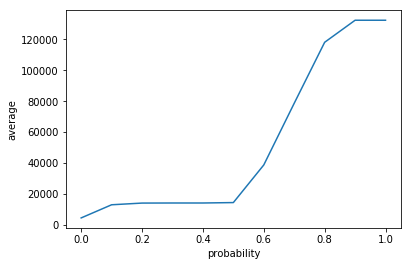

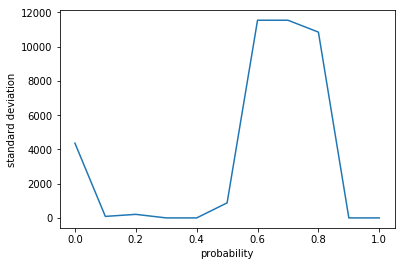

In [5]:
# True False가 들어간 2차원 배열에서 군집을 만들어 True의 개수가 제일 큰 군집을 출력하라.
# 그래프도 그려라 2차원 배열크기 : 최저 20 by 20, 샘플수 : 최소100개 
# 평균과 표준편차도 그려보라. 확률을 0부터 1까지 0.1씩 증가시키면서 HOMEWORK #0 

import numpy as np
import random
import sys
import math
from collections import Counter
import matplotlib.pyplot as plt
sys.setrecursionlimit(999999999)

n = int(input("n"))
list1 = np.full((n,n),'F')

cnt=0

size = []
plist = []
avlist = []
sdlist = []

addRow = np.array((-1,0,1,0))
addCol = np.array((0,1,0,-1))


def dfs(row,col,key):
    list1[row][col] = int(key)
    
    for i in range(4):
        nextRow = row + addRow[i]
        nextCol = col + addCol[i]
        if(nextRow<0 or nextRow >n-1 or nextCol<0 or nextCol>n-1): # 상하좌우를 판별할 때 행렬밖에있으면 for문의 첫번째로 분기
            continue
        if list1[nextRow][nextCol] == 'F':
            nextRow = row
            nextCol = col
            continue
        if list1[nextRow][nextCol] == 'T':
            dfs(nextRow,nextCol,int(key))
    

def execution():
    global cnt
    for i in range(n):
        for j in range(n):
            if(random.random()<0.5):
                list1[i][j] = 'T'
    
    for i in range(n):
        for j in range(n):
            if list1[i][j] =='T':
                cnt+=1
                dfs(i,j,cnt+1)
    

    for i in range(n):
        for j in range(n):
            if list1[i][j] != 'F':
                if(int(list1[i][j])>1):
                    size.append(list1[i][j])
    res = Counter(size).values()
    return max(res)

def execution_sampling(num_samp):
    sum = 0
    sum2 = 0
    for _ in range(num_samp):
        val = execution()
        sum += val
        sum2 += val*val
    avg = sum/num_samp
    avg2 = sum2/num_samp    
    return avg, math.sqrt(avg2-avg*avg)
    

def prob_setting():
    prob=0
    while prob<=1:
        plist.append(prob)
        prob+=0.1
    for prob in plist:
        val1, val2 = execution_sampling(100)
        avlist.append(val1)
        sdlist.append(val2)

def draw_graph():
    plt.plot(plist,avlist)
    plt.ylabel('average')
    plt.xlabel('probability')
    plt.show()

    plt.plot(plist,sdlist)
    plt.ylabel('standard deviation')
    plt.xlabel('probability')
    plt.show()

prob_setting()
draw_graph()

In [2]:
###문제[1] Random Walker(RW)
import numpy as np
import random
import sys
import math
from collections import Counter
import matplotlib.pyplot as plt
sys.setrecursionlimit(999999999)

n = int(input("n"))
list1 = np.full((n,n),'F')

cnt=0

size = []
plist = []
avlist = []
sdlist = []

addRow = np.array((-1,0,1,0))
addCol = np.array((0,1,0,-1))


def dfs(row,col,key):
    list1[row][col] = int(key)
    
    for i in range(4):
        nextRow = row + addRow[i]
        nextCol = col + addCol[i]
        if(nextRow<0 or nextRow >n-1 or nextCol<0 or nextCol>n-1): # 상하좌우를 판별할 때 행렬밖에있으면 for문의 첫번째로 분기
            continue
        if list1[nextRow][nextCol] == 'F':
            nextRow = row
            nextCol = col
            continue
        if list1[nextRow][nextCol] == 'T':
            dfs(nextRow,nextCol,int(key))
    

def execution():
    global cnt
    for i in range(n):
        for j in range(n):
            if(random.random()<0.5):
                list1[i][j] = 'T'
    
    for i in range(n):
        for j in range(n):
            if list1[i][j] =='T':
                cnt+=1
                dfs(i,j,cnt+1)
    

    for i in range(n):
        for j in range(n):
            if list1[i][j] != 'F':
                if(int(list1[i][j])>1):
                    size.append(list1[i][j])
    res = Counter(size).values()
    max1 = max(res)
    print(list1)
    print(max1)
    
execution()

n10
[['F' '2' 'F' 'F' 'F' 'F' 'F' '3' 'F' '4']
 ['5' 'F' 'F' 'F' '6' '6' 'F' 'F' 'F' '4']
 ['F' '6' '6' '6' '6' '6' 'F' '7' 'F' 'F']
 ['F' 'F' '6' '6' '6' 'F' 'F' 'F' '8' '8']
 ['F' '6' '6' 'F' 'F' '9' 'F' 'F' 'F' 'F']
 ['F' 'F' 'F' '9' '9' '9' '9' '9' 'F' 'F']
 ['1' '1' '1' 'F' 'F' 'F' 'F' 'F' 'F' 'F']
 ['F' 'F' '1' 'F' 'F' 'F' '1' 'F' '1' '1']
 ['F' '1' 'F' 'F' '1' 'F' 'F' '1' 'F' '1']
 ['F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F']]
12


In [7]:
import random
import numpy as np
n = int(input("원하는 배열크기를 입력하세요 : n"))
list1 = np.full((n,n),'0')
list2 = [] # T가 들어간 곳
list3 = [] # i,j를 중점으로 5by5구역
addRow = [-1,1,0,0]
addCol = [0,0,1,-1]
count=0

def namu(i,j):
    if i>0 and j>0 and i<n-1 and j<n-1:
        for a in range(-1,2,1):
            for b in range(-1,2,1):
                list1[i+a][j+b] = 'T'
                
        for c in range(-1,2,1):
            for d in range(-1,2,1):
                list2.append((i+c,j+d))

        for e in range(-2,3,1):
            for f in range(-2,3,1):
                list3.append((i+e,j+f))
    
        
    
                
def pick():
    global count
    while True:
        
        if count==4:
            break
        i = random.randint(1,n-2)
        j = random.randint(1,n-2)
        if (i,j) in list3:
            continue
        if (i,j) not in list3:
            count+=1
            namu(i,j)
            
    return list1
    
def random_walker():
    while True:
        
        z = random.randint(0,n-1)
        v = random.randint(0,n-1)
        if (z,v) not in list2:
            list1[z][v] = 'X'
            print(list1)
            break
        if (z,v) in list2:
            continue
           
    while True:
        
        L = input("p를 누르세요")
        if L == 'p':
            
            while True:
                x = random.randint(-1,1)
                y = random.randint(-1,1)
                if(x,y) ==(0,0) or (x,y) ==(1,1) or (x,y) == (-1,-1) or (x,y) == (1,-1) or (x,y) ==(-1,1):
                    continue
                if (z+x,v+y) in list2:
                    continue

                if (z+x,v+y) not in list2:
                    if (z,v) not in list2:
                        if ((z+x>-1 and z+x<n and v+y>-1 and v+y<n))and((z>-1 and z<n and v>-1 and v<n)):
                            list1[z][v] = '0'
                            list1[z+x][v+y] = 'X'
                            z = z+x
                            v = v+x
                            print(list1)
                            break
        if L == 'q':
            break

        
        
    
pick()
random_walker()
    




# if (i,j) not in list3:
        


원하는 배열크기를 입력하세요 : n10
[['0' '0' '0' '0' '0' '0' '0' '0' 'X' '0']
 ['0' '0' 'T' 'T' 'T' '0' '0' '0' '0' '0']
 ['0' '0' 'T' 'T' 'T' '0' '0' '0' '0' '0']
 ['0' '0' 'T' 'T' 'T' 'T' 'T' 'T' '0' '0']
 ['0' '0' 'T' 'T' 'T' 'T' 'T' 'T' '0' '0']
 ['0' '0' 'T' 'T' 'T' 'T' 'T' 'T' '0' '0']
 ['0' '0' 'T' 'T' 'T' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' 'T' 'T' 'T' '0' '0' '0']
 ['0' '0' '0' '0' 'T' 'T' 'T' '0' '0' '0']
 ['0' '0' '0' '0' 'T' 'T' 'T' '0' '0' '0']]
p를 누르세요q
